In [43]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from a_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret) 

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [44]:
target_user = input()

@amazon


In [45]:
api.search(geocode='37.7525098, -122.4475683,3.5mi')

{'search_metadata': {'completed_in': 0.014,
  'count': 15,
  'max_id': 987094853329678336,
  'max_id_str': '987094853329678336',
  'query': '',
  'refresh_url': '?since_id=987094853329678336&q=&geocode=37.7525098%2C%20-122.4475683%2C3.5mi&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': []}

In [46]:
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id

oldest_tweet = None
geocodes = '37.7525098, -122.4475683 3.5mi'

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.search(target_user, count=10, result_type="recent", max_id = oldest_tweet, geocodes=geocodes)

public_tweets

{'search_metadata': {'completed_in': 0.034,
  'count': 10,
  'max_id': 987094820819734529,
  'max_id_str': '987094820819734529',
  'next_results': '?max_id=987094756718252036&q=%40amazon&count=10&include_entities=1&result_type=recent',
  'query': '%40amazon',
  'refresh_url': '?since_id=987094820819734529&q=%40amazon&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Thu Apr 19 22:25:19 +0000 2018',
   'entities': {'hashtags': [],
    'media': [{'display_url': 'pic.twitter.com/0odxEaO0oX',
      'expanded_url': 'https://twitter.com/Theanatoliapost/status/987094820819734529/photo/1',
      'id': 987094782798213120,
      'id_str': '987094782798213120',
      'indices': [90, 113],
      'media_url': 'http://pbs.twimg.com/media/DbLdeaBUMAAWtlz.jpg',
      'media_url_https': 'https://pbs.twimg.com/media/DbLdeaBUMAAWtlz.jpg',
      'sizes': {'large': {'h': 486, 'resize': 'fit', 'w': 

In [47]:
counter = 1

# Variables for holding sentiments
sentiments = []

# Variable for max_id

oldest_tweet = None
geocodes = '37.7525098, -122.4475683 3.5mi'

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.search(target_user, count=100, result_type="recent", max_id = oldest_tweet)

    
    # Loop through all tweets 
    for tweet in public_tweets["statuses"]:

       
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        #Add to counter 
        counter += 1

In [48]:
public_tweets

{'search_metadata': {'completed_in': 0.061,
  'count': 100,
  'max_id': 987085989700161535,
  'max_id_str': '987085989700161535',
  'next_results': '?max_id=987084283037736959&q=%40amazon&count=100&include_entities=1&result_type=recent',
  'query': '%40amazon',
  'refresh_url': '?since_id=987085989700161535&q=%40amazon&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Thu Apr 19 21:50:09 +0000 2018',
   'entities': {'hashtags': [{'indices': [8, 14], 'text': 'sales'},
     {'indices': [15, 20], 'text': 'save'},
     {'indices': [21, 29], 'text': 'forkids'},
     {'indices': [30, 38], 'text': 'carseat'}],
    'symbols': [],
    'urls': [{'display_url': 'twitter.com/i/web/status/9…',
      'expanded_url': 'https://twitter.com/i/web/status/987085969689055232',
      'indices': [117, 140],
      'url': 'https://t.co/ldKn7EHnro'}],
    'user_mentions': [{'id': 20793816,
      'id_str

In [49]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[['Date','Compound','Negative','Neutral','Positive','Tweets Ago']]
sentiments_pd.head()

,Date,Compound,Negative,Neutral,Positive,Tweets Ago
0,Thu Apr 19 22:26:14 +0000 2018,0.0000,1.000,0.0,0.000,1
1,Thu Apr 19 22:26:10 +0000 2018,0.0000,1.000,0.0,0.000,2
2,Thu Apr 19 22:25:55 +0000 2018,0.3400,0.909,0.0,0.091,3
3,Thu Apr 19 22:25:53 +0000 2018,0.6114,0.810,0.0,0.190,4
4,Thu Apr 19 22:25:50 +0000 2018,0.5859,0.863,0.0,0.137,5


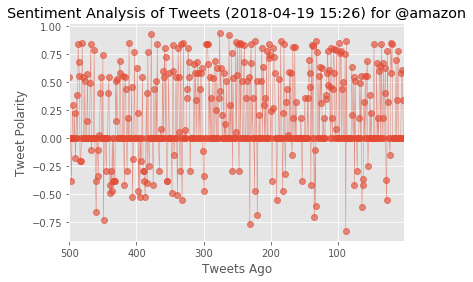

In [50]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=100)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.figure(figsize=(200,800))
plt.show()

In [51]:
#target_terms = ('@McDonalds', '@BurgerKing', '@CarlsJr','@innoutburger')
target_terms = ('@realDonaldTrump','@narendramodi','@SrBachchan')#,'@CarlsJr' )
# List to hold results
results_list = []
# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id = oldest_tweet,geocodes=geocodes)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

#             
                # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

                # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

{'User': '@realDonaldTrump', 'Compound': 0.1412878, 'Positive': 0.116176, 'Neutral': 0.058998, 'Negative': 0.824828, 'Tweet Count': 500}

{'User': '@narendramodi', 'Compound': 0.015672199999999997, 'Positive': 0.053336, 'Neutral': 0.044768, 'Negative': 0.901912, 'Tweet Count': 500}

{'User': '@SrBachchan', 'Compound': 0.103881, 'Positive': 0.07925600000000001, 'Neutral': 0.028637999999999997, 'Negative': 0.8921140000000001, 'Tweet Count': 500}



In [52]:
all_restaurants_df = pd.DataFrame(results_list).set_index("User").round(2)
#all_restaurants_df = all_restaurants_df.sort_values(["Negative","Positive"], ascending=False)
all_restaurants_df.reset_index(inplace=True)
all_restaurants_df

,User,Compound,Negative,Neutral,Positive,Tweet Count
0,@realDonaldTrump,0.14,0.82,0.06,0.12,500
1,@narendramodi,0.02,0.90,0.04,0.05,500
2,@SrBachchan,0.10,0.89,0.03,0.08,500


In [53]:
positive = all_restaurants_df[['User','Compound']]
positive  

,User,Compound
0,@realDonaldTrump,0.14
1,@narendramodi,0.02
2,@SrBachchan,0.10


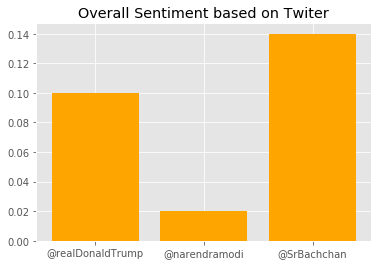

In [54]:
x_axis=np.arange(len(positive))
tick_location= [value+0.4 for value in x_axis]
plt.bar(positive.User, positive.Compound, color="orange", align="edge")
plt.xticks(tick_location,positive.User)
plt.title("Overall Sentiment based on Twiter")
plt.show()
